# Facebook Friend Recommendation - Model Training

In [1]:
#Importing Libraries

import warnings
warnings.filterwarnings("ignore")
import csv
import pandas as pd
import datetime 
import time 
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.cluster import MiniBatchKMeans, KMeans
import math
import pickle
import os
import xgboost as xgb
import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('storage_sample_stage5.h5', 'train_df',mode='r')
df_final_test = read_hdf('storage_sample_stage5.h5', 'test_df',mode='r')

In [3]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'follower_pref', 'followee_pref', 'svd_dot_u', 'svd_dot_v'],
      dtype='object')

In [4]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [5]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

# Applying Random Forest

Estimators =  10 Train Score 0.9173345593997847 test Score 0.8935879945429741
Estimators =  50 Train Score 0.9192386456958116 test Score 0.9118612185181315
Estimators =  100 Train Score 0.9198345726460022 test Score 0.9152137468566639
Estimators =  250 Train Score 0.9201179102293396 test Score 0.9128496319663512
Estimators =  450 Train Score 0.9213363308412192 test Score 0.9138925129413746


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

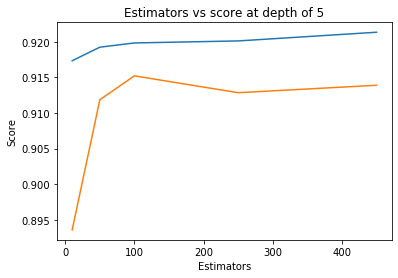

In [6]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.9065758935478879 test Score 0.8888283264501793
depth =  9 Train Score 0.9580932212018164 test Score 0.9207555133481059
depth =  11 Train Score 0.9612422006788204 test Score 0.9250105263157894
depth =  15 Train Score 0.9630285272453506 test Score 0.9259298327039516
depth =  20 Train Score 0.9637434023548518 test Score 0.9263804972526896
depth =  35 Train Score 0.9637238383305252 test Score 0.9263219939373527
depth =  50 Train Score 0.9637238383305252 test Score 0.9263219939373527
depth =  70 Train Score 0.9637238383305252 test Score 0.9263219939373527
depth =  130 Train Score 0.9637238383305252 test Score 0.9263219939373527


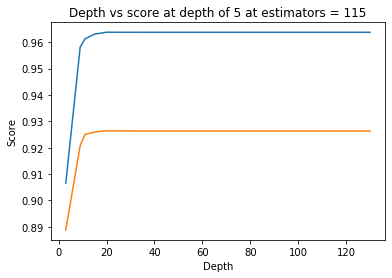

In [7]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [9]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25,return_train_score=True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96200265 0.96203932 0.96068403 0.96145238 0.96293889]
mean train scores [0.9628679  0.96274941 0.96097477 0.96219709 0.96407718]


In [10]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [11]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [12]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [13]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9641732843187033
Test f1 score 0.9263485914010191


In [14]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


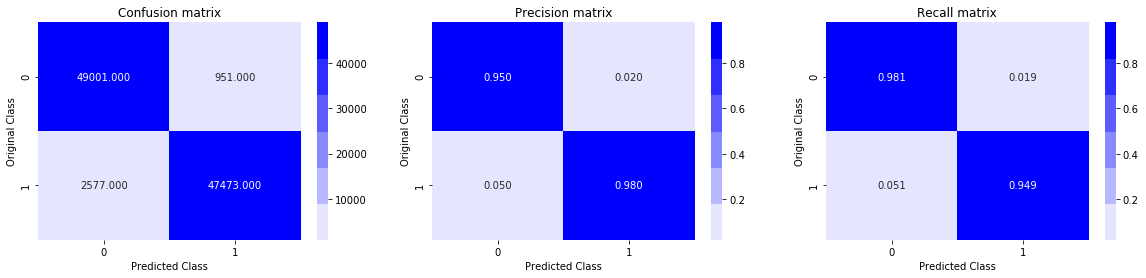

Test confusion_matrix


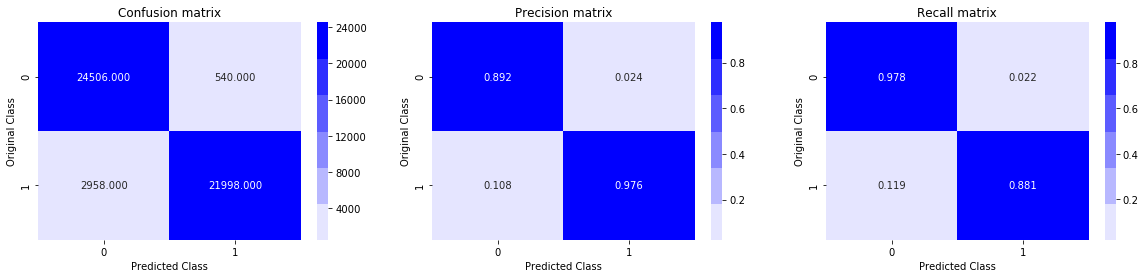

In [15]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

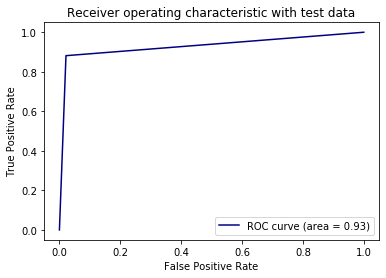

In [16]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

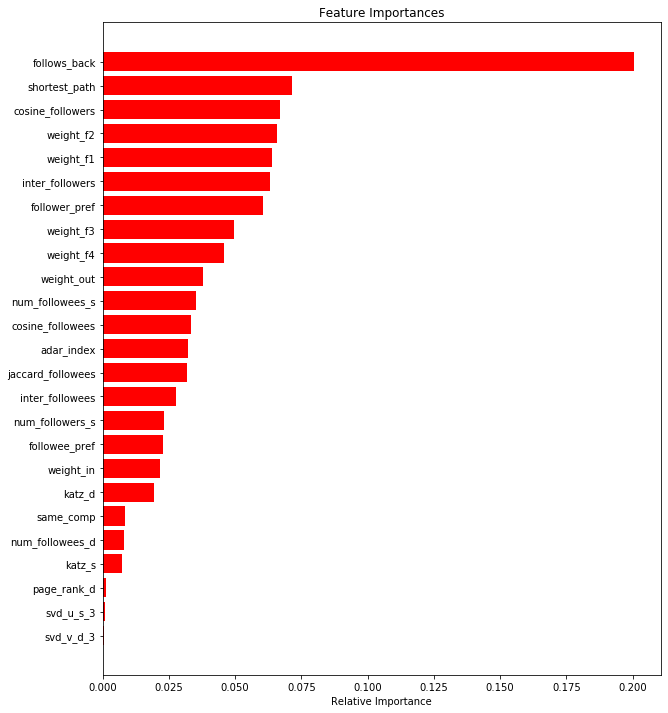

In [17]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h1> <font color=blue> Observations : </font> </h1>

- By using Random Forest we are getting Test F1 score = 0.926
- The test F1 score achieved is good
- Since the difference btw the F1-score of Train and test is low we can say that our model is not overfitting
- Follows_back is the most important feature for predicting the yi

# Applying XGBoost

In [18]:
clf = xgb.XGBClassifier()
param_dist = {"n_estimators":sp_randint(105,125), "max_depth": sp_randint(2,10)}

model = RandomizedSearchCV(clf, param_distributions=param_dist,n_jobs=4,
                                   n_iter=5,cv=3,scoring='f1',random_state=25,return_train_score = True)
model.fit(df_final_train,y_train)

print('mean test scores',model.cv_results_['mean_test_score'])
print('mean train scores',model.cv_results_['mean_train_score'])

mean test scores [0.982057   0.98178476 0.97990764 0.98150777 0.97761101]
mean train scores [0.99867525 0.99987511 0.98672736 0.99762911 0.98072057]


In [19]:
results = pd.DataFrame.from_dict(model.cv_results_)
results = results.sort_values(['param_max_depth','param_n_estimators'])

train_auc =results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']

results_score_sorted = results.sort_values(by=['mean_test_score'],ascending=False)
results_score_sorted.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,208.594394,0.554248,0.854484,0.028172,6,120,"{'max_depth': 6, 'n_estimators': 120}",0.982903,0.981165,0.982103,0.982057,0.000710,1,0.998500,0.998875,0.998650,0.998675,0.000154
1,231.970757,0.495957,0.931342,0.018451,7,117,"{'max_depth': 7, 'n_estimators': 117}",0.983025,0.981377,0.980952,0.981785,0.000894,2,0.999910,0.999835,0.999880,0.999875,0.000031
3,187.875226,0.299105,0.779428,0.016323,6,109,"{'max_depth': 6, 'n_estimators': 109}",0.982296,0.981101,0.981126,0.981508,0.000557,3,0.997569,0.997795,0.997524,0.997629,0.000118
2,141.185177,0.492389,0.611771,0.025411,4,113,"{'max_depth': 4, 'n_estimators': 113}",0.980326,0.980302,0.979095,0.979908,0.000575,4,0.986119,0.987441,0.986622,0.986727,0.000545
4,94.781608,11.604988,0.449913,0.068105,3,110,"{'max_depth': 3, 'n_estimators': 110}",0.978394,0.976902,0.977537,0.977611,0.000611,5,0.980477,0.980821,0.980863,0.980721,0.000173


In [20]:
print(model.best_estimator_)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=120, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


In [21]:
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=117,
       n_jobs=4, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [22]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [23]:
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9841039588999697
Test f1 score 0.9295595618922526


Train confusion_matrix


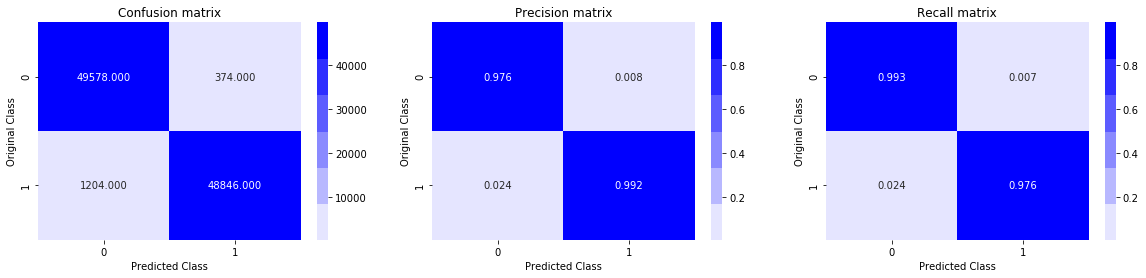

Test confusion_matrix


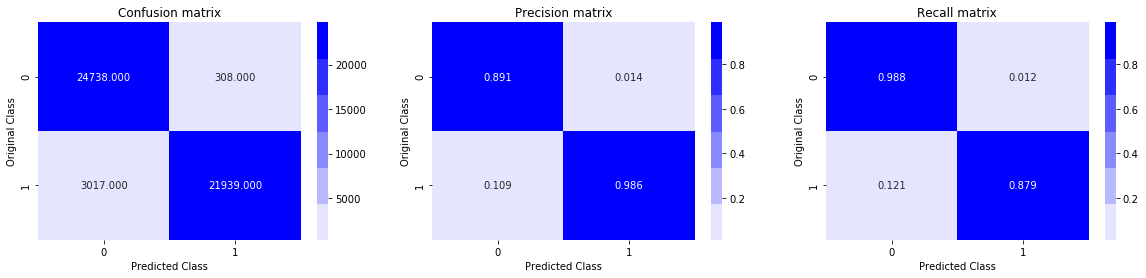

In [24]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

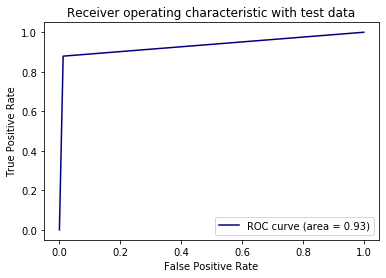

In [25]:
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

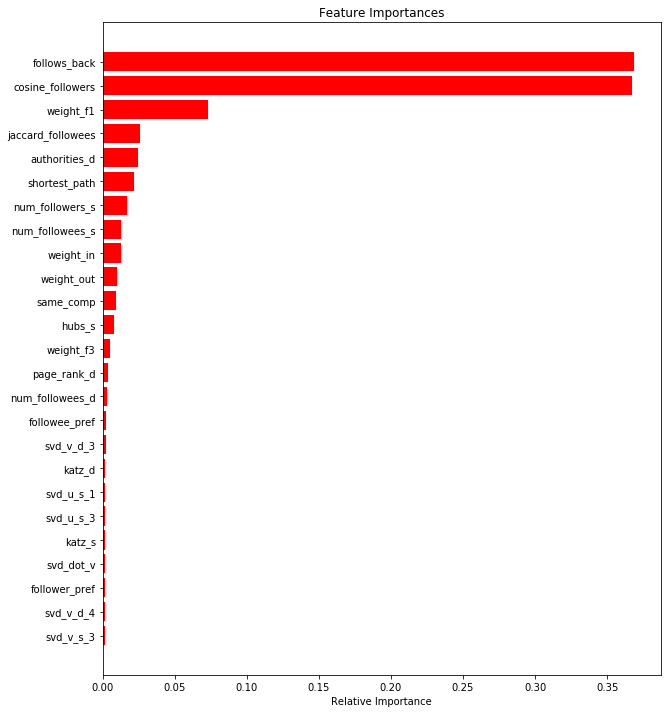

In [26]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h1> <font color=blue> Observations : </font> </h1>

- For XGBoost the F1 score achieved on Test data is 92.9 
- The test F1-score is slightly better than Random Forest score
- Follows_back and Cosine_followers are two of the most important features

<h1> <font color=red> Procedure Followed </font></h1>

<h3><font color=blue> Problem Statement : </font></h3> Given a directed social graph, have to predict missing links to recommend users (Link Prediction in graph)

<b> Step 1 : </b> We have given a file that consists of source and destination node. First we have used networkx package which is primarary used for graph based features.

<b> Step 2 : </b> Then I have done Exploratory Data Analysis to get insights of our data. I have get importatnt information about the vertices. 

<b> Step 3 : </b> We cannot directly used this features for machine learning models so first we have posed this problem as classification problem.

<b> Step 4 : </b> For our machine learning model we need to have different features that helps in predicting the class label. By using Feature engineering wwe have developed some features such as jaccard dist <sup>n</sup>, cosine distance, etc.

<b> Step 5 : </b> After developing features I have applied Random Forest and XGBoost model to see how well our features are helping for predicting the class label. For both the Random Forest and XGBoost the Test F1-score is similar.

<h2> <font color= blue> Conclusion </font></h2> 

- Random Forest and XGBoost both the models performs similar.
- They both have good Test F1-score.
- XGBoost model have slightly higher F1-score than the Random Forest.
- In recall matrix the changes in data is same for the Random forest and XGBoost model.
- If we add some more features the Recall matrix values might improve.